This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [171]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
from private import privatePass
API_KEY = privatePass

# Note: 
# You'll need to create a file, private.py, that contains:
#     privatePass = "API_KEY"
# Note: private.py is in .gitignore

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [156]:
# First, import the relevant modules
import requests


In [157]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned

r = requests.get('https://www.quandl.com/api/v3/datasets/FSE/AFX_X/data.json?start_date=2017-01-01&end_date=2017-12-31&api_key='+API_KEY)


In [41]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure

# Please refer to the Section 1.1 

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

# Solutions

## Data Collection 
Data already downloaded using 'requests' package, and saved in 'quandl_data.txt'

## Convert JSON to Python Dictonary

In [159]:
# Load JSON as Python Dictionary, for data in 2017
data = r.json()

In [160]:
## In case there is any issu with API, please use data saved in local copy 
# import json
# with open('quandl_data.txt') as json_file:  
#     data = json.load(json_file)

In [161]:
# Inspection of Data
print('Level 1 Keys: ' + str(data.keys()))
for key, value in data['dataset_data'].items():
    print(key,':',value)

# Keys to be used for this assignment are found to be
# 'column_names' = ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 
#                   'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']
# 'data' = [['2017-12-29', 51.76, 51.94, 51.45, 51.76, None, 34640.0, 1792304.0, None, None, None], ...]
data2 = data['dataset_data']['data']  # only data

Level 1 Keys: dict_keys(['dataset_data'])
limit : None
transform : None
column_index : None
column_names : ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']
start_date : 2017-01-01
end_date : 2017-12-31
frequency : daily
data : [['2017-12-29', 51.76, 51.94, 51.45, 51.76, None, 34640.0, 1792304.0, None, None, None], ['2017-12-28', 51.65, 51.82, 51.43, 51.6, None, 40660.0, 2099024.0, None, None, None], ['2017-12-27', 51.45, 51.89, 50.76, 51.82, None, 57452.0, 2957018.0, None, None, None], ['2017-12-22', 51.05, 51.5, 50.92, 51.32, None, 71165.0, 3641949.0, None, None, None], ['2017-12-21', 51.16, 51.52, 50.9, 51.4, None, 120649.0, 6179433.0, None, None, None], ['2017-12-20', 51.88, 52.04, 51.2, 51.27, None, 50587.0, 2610258.0, None, None, None], ['2017-12-19', 52.73, 52.73, 51.07, 51.66, None, 137313.0, 7102361.0, None, None, None], ['2017-12-18', 52.37, 52.75, 51.61, 52.62, None, 129733.0, 6770

## Highest and lowest opening prices

In [162]:
# According to 'column_names'
# 2nd column = Open Price
open_price = [x[1] for x in data2 if x[1]!=None]  # needs to exclude None. 
print('The highest opening price during 2017 is : ',max(open_price))
print('The lowest opening price during 2017 is : ',min(open_price))

The highest opening price during 2017 is :  53.11
The lowest opening price during 2017 is :  34.0


## Largest change in any one day (based on High and Low price)

In [163]:
# 3rd column = High
# 4th column = Low
# daily difference between high and low
daily_price_change = [(x[2]-x[3]) for x in data2 if x[2]!=None and x[3]!=None] 
print('The largest change in any one day during 2017 is : ',max(daily_price_change))

The largest change in any one day during 2017 is :  2.8100000000000023


## Largest change between any two days (based on Closing Price)

In [164]:
# 5th column = Close
# difference between two days, in terms of Closing Price
close_price_diff = [(data2[n][4]-data2[n-1][4]) for n in range(1,len(data2)) if (data2[n][4]-data2[n-1][4])!=None]
print('The largest change between two days during 2017 is : ',max(close_price_diff, key=abs))  
# need to consider absolute values

The largest change between two days during 2017 is :  2.559999999999995


## Average daily trading volume during this year

In [165]:
# 7th column = Traded Volume
# daily trading volume
daily_trade_volume = [x[6] for x in data2 if x[6]!=None]
print('The average daily trading volume during 2017 is : ',sum(daily_trade_volume)/len(daily_trade_volume))

The average daily trading volume during 2017 is :  89124.33725490196


## Median trading volume

In [166]:
def func_median(x_list):
    x_list.sort()
    n = len(x_list)
    if n % 2 == 0:  ## even number of elements
        median_value = (x_list[n/2-1]+x_list[n/2])/2
    else:  ## odd number of elements
        median_value = x_list[n//2]
    return median_value

In [167]:
print('The median trading volume during 2017 is : ',func_median(daily_trade_volume))

The median trading volume during 2017 is :  76286.0


In [168]:
## Additional: look at the distribution of daily trading volume
import matplotlib.pyplot as plt
%matplotlib inline

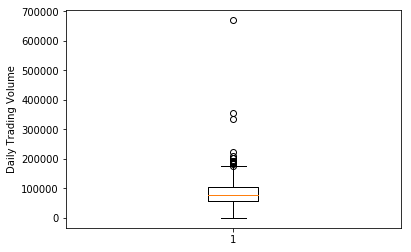

In [169]:
plt.boxplot(daily_trade_volume)
plt.ylabel('Daily Trading Volume')
plt.show()

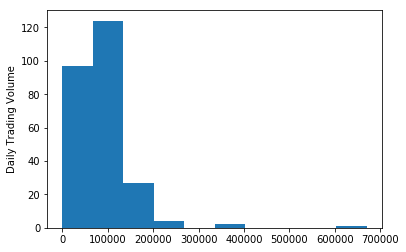

In [170]:
plt.hist(daily_trade_volume)
plt.ylabel('Daily Trading Volume')
plt.show()

END 